In [1]:
import pandas as pd
import numpy as np

In [39]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [2]:
df = pd.read_csv('data/스마트서울 도시데이터 센서(S-DoT) 유동인구 측정 정보.csv', encoding='ansi', parse_dates=['측정시간'])

In [3]:
df.drop(['등록일'], axis =1, inplace=True)

In [4]:
df

,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수
0,SDOT001,2994,2023-02-07_23:47:00,traditional_markets,Dongjak-gu,Sang-do1-dong,187
1,SDOT001,4008,2023-02-07_23:41:00,main_street,Gangnam-gu,Daechi4-dong,15
2,SDOT001,3039,2023-02-07_23:47:00,traditional_markets,Dongjak-gu,Sadang2-dong,162
3,SDOT001,4009,2023-02-07_23:46:00,main_street,Gangnam-gu,Daechi4-dong,93
4,SDOT001,3033,2023-02-07_23:47:00,traditional_markets,Dongjak-gu,Sadang2-dong,114
...,...,...,...,...,...,...,...
474269,SDOT001,4023,2022-12-31_23:50:00,main_street,Gangseo-gu,Banghwa3-dong,0
474270,SDOT001,4040,2022-12-31_23:57:00,main_street,Jongno-gu,Ihwa-dong,7
474271,SDOT001,3014,2022-12-31_23:56:00,traditional_markets,Gangbuk-gu,Mia-dong,207
474272,SDOT001,4039,2022-12-31_23:51:00,main_street,Jongno-gu,Samcheong-dong,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474274 entries, 0 to 474273
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   모델번호    474274 non-null  object
 1   시리얼     474274 non-null  int64 
 2   측정시간    474274 non-null  object
 3   지역      474274 non-null  object
 4   자치구     474274 non-null  object
 5   행정동     474274 non-null  object
 6   방문자수    474274 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 25.3+ MB


In [6]:
df['time'] = pd.to_datetime(df['측정시간'], format='%Y-%m-%d_%H:%M:%S', errors='raise')
df

,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,time
0,SDOT001,2994,2023-02-07_23:47:00,traditional_markets,Dongjak-gu,Sang-do1-dong,187,2023-02-07 23:47:00
1,SDOT001,4008,2023-02-07_23:41:00,main_street,Gangnam-gu,Daechi4-dong,15,2023-02-07 23:41:00
2,SDOT001,3039,2023-02-07_23:47:00,traditional_markets,Dongjak-gu,Sadang2-dong,162,2023-02-07 23:47:00
3,SDOT001,4009,2023-02-07_23:46:00,main_street,Gangnam-gu,Daechi4-dong,93,2023-02-07 23:46:00
4,SDOT001,3033,2023-02-07_23:47:00,traditional_markets,Dongjak-gu,Sadang2-dong,114,2023-02-07 23:47:00
...,...,...,...,...,...,...,...,...
474269,SDOT001,4023,2022-12-31_23:50:00,main_street,Gangseo-gu,Banghwa3-dong,0,2022-12-31 23:50:00
474270,SDOT001,4040,2022-12-31_23:57:00,main_street,Jongno-gu,Ihwa-dong,7,2022-12-31 23:57:00
474271,SDOT001,3014,2022-12-31_23:56:00,traditional_markets,Gangbuk-gu,Mia-dong,207,2022-12-31 23:56:00
474272,SDOT001,4039,2022-12-31_23:51:00,main_street,Jongno-gu,Samcheong-dong,3,2022-12-31 23:51:00


In [7]:
# 새로운 측정시간 삽입을 위해 기존 측정시간컬럼 삭제
df.drop(['측정시간','지역'], axis =1, inplace=True)

In [8]:
# 측정시간 문자열분리
time = df['time'].dt.hour

Month = df['time'].dt.month

In [9]:
# 새로운 측정시간 컬럼 삽입
df['측정시간'] = time
df['월'] = Month
df

,모델번호,시리얼,자치구,행정동,방문자수,time,측정시간,월
0,SDOT001,2994,Dongjak-gu,Sang-do1-dong,187,2023-02-07 23:47:00,23,2
1,SDOT001,4008,Gangnam-gu,Daechi4-dong,15,2023-02-07 23:41:00,23,2
2,SDOT001,3039,Dongjak-gu,Sadang2-dong,162,2023-02-07 23:47:00,23,2
3,SDOT001,4009,Gangnam-gu,Daechi4-dong,93,2023-02-07 23:46:00,23,2
4,SDOT001,3033,Dongjak-gu,Sadang2-dong,114,2023-02-07 23:47:00,23,2
...,...,...,...,...,...,...,...,...
474269,SDOT001,4023,Gangseo-gu,Banghwa3-dong,0,2022-12-31 23:50:00,23,12
474270,SDOT001,4040,Jongno-gu,Ihwa-dong,7,2022-12-31 23:57:00,23,12
474271,SDOT001,3014,Gangbuk-gu,Mia-dong,207,2022-12-31 23:56:00,23,12
474272,SDOT001,4039,Jongno-gu,Samcheong-dong,3,2022-12-31 23:51:00,23,12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474274 entries, 0 to 474273
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   모델번호    474274 non-null  object        
 1   시리얼     474274 non-null  int64         
 2   자치구     474274 non-null  object        
 3   행정동     474274 non-null  object        
 4   방문자수    474274 non-null  int64         
 5   time    474274 non-null  datetime64[ns]
 6   측정시간    474274 non-null  int64         
 7   월       474274 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 28.9+ MB


In [42]:
# df['자치구'] == 'Songpa -gu' | df['행정동'] == 

0         False
1         False
2         False
3         False
4         False
          ...  
474269    False
474270    False
474271    False
474272    False
474273    False
Name: 자치구, Length: 474274, dtype: bool

In [11]:
df.drop(['time','모델번호','시리얼','행정동'], axis =1, inplace=True)
df

,자치구,방문자수,측정시간,월
0,Dongjak-gu,187,23,2
1,Gangnam-gu,15,23,2
2,Dongjak-gu,162,23,2
3,Gangnam-gu,93,23,2
4,Dongjak-gu,114,23,2
...,...,...,...,...
474269,Gangseo-gu,0,23,12
474270,Jongno-gu,7,23,12
474271,Gangbuk-gu,207,23,12
474272,Jongno-gu,3,23,12


In [12]:
df['자치구'].unique()

array(['Dongjak-gu', 'Gangnam-gu', 'Seocho-gu', 'Yangcheon-gu',
       'Seodaemun-gu', 'Mapo-gu', 'Songpa-gu', 'Seongdong-gu', 'Nowon-gu',
       'Dobong-gu', 'Seoul_Grand_Park', 'Guro-gu', 'Gangdong-gu',
       'Gwangjin-gu', 'Gangseo-gu', 'Gwanak-gu', 'Gangbuk-gu',
       'Geumcheon-gu', 'Jongno-gu', 'Eunpyeong-gu', 'Yongsan-gu',
       'Jung-gu', 'Jungnang-gu'], dtype=object)

In [15]:
df['월'].unique()

array([ 2,  1, 12], dtype=int64)

In [18]:
df['자치구'].unique()

array(['Dongjak-gu', 'Gangnam-gu', 'Seocho-gu', 'Yangcheon-gu',
       'Seodaemun-gu', 'Mapo-gu', 'Songpa-gu', 'Seongdong-gu', 'Nowon-gu',
       'Dobong-gu', 'Seoul_Grand_Park', 'Guro-gu', 'Gangdong-gu',
       'Gwangjin-gu', 'Gangseo-gu', 'Gwanak-gu', 'Gangbuk-gu',
       'Geumcheon-gu', 'Jongno-gu', 'Eunpyeong-gu', 'Yongsan-gu',
       'Jung-gu', 'Jungnang-gu'], dtype=object)

In [41]:
groups = df.groupby(['자치구','월','측정시간']).mean()
groups

방문자수
자치구        월  측정시간            
Dobong-gu  1  0     159.558577
              1     155.415138
              2     149.895722
              3     147.828283
              4     148.746479
...                        ...
Yongsan-gu 2  20      5.805556
              21      5.388889
              22      4.250000
              23      2.100000
           12 23      3.000000

[1127 rows x 1 columns]

In [ ]:
month_2 = df[df['time'].dt.month == 2]
month_2

In [ ]:
m = pd.DataFrame(month_2['측정시간'].value_counts()).sort_index()
m

<AxesSubplot:>

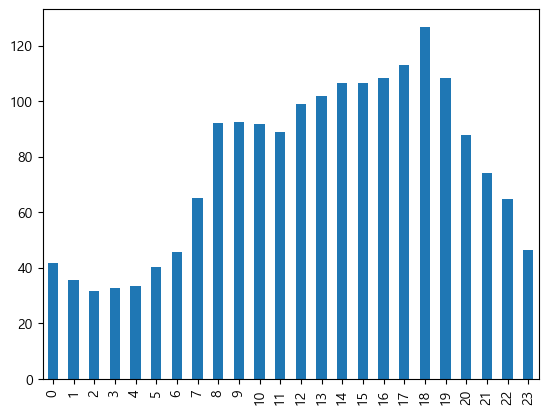

In [54]:
g20 = pd.pivot_table(data = df[df['자치구'] == 'Gangseo-gu'], 
                     index = '측정시간', aggfunc = 'mean').reset_index()
g20['방문자수'].plot.bar()

<AxesSubplot:>

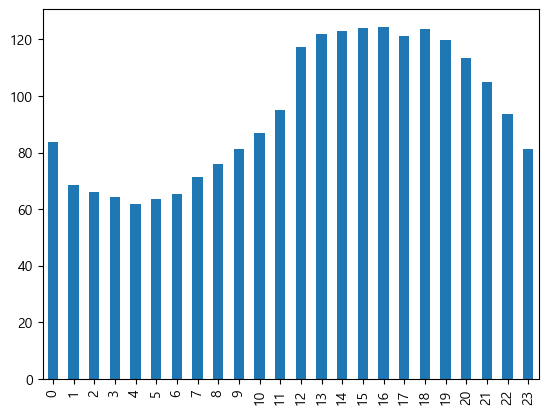

In [55]:
g20 = pd.pivot_table(data = df[df['자치구'] == 'Songpa-gu'], 
                     index = '측정시간', aggfunc = 'mean').reset_index()
g20['방문자수'].plot.bar()